In [1]:
import pandas as pd
import numpy as np
import shap

In [2]:
import pickle
f = open("output/catboostvanilla","rb")
model = pickle.load(f)

f = open("output/train_info.pickle","rb")
train_x, train_y, num_x, cat_x = pickle.load(f)

In [61]:
TREEMODEL = True # set true when using a tree like model. Much faster
shap.initjs()
if TREEMODEL:
    explainer = shap.TreeExplainer(model.named_steps["model"])
    observations = model.named_steps["preprocess"].transform(train_x.sample(100, random_state=42)) #note the toarray
    all_x = num_x + cat_x
    
    shap_values = explainer.shap_values(observations)
    # from catboost  import Pool
    # cat_x_ind = list(range(len(num_x),len(train_x.columns))) # in the pipeline categorical comes after numeric
    # shap_values = explainer.shap_values(Pool(observations, cat_features=cat_x_ind)) #possibly for catboost

else:
    train_trans = model.named_steps["preprocess"].transform(train_x.sample(100, random_state=18))
    explainer = shap.KernelExplainer(model.named_steps["model"].predict,train_trans)
    observations = model.named_steps["preprocess"].transform(train_x.sample(10, random_state=42))
    all_x = num_x + list(model['preprocess'].transformers_[1][1]['onehot_cat'].get_feature_names(cat_x))
    shap_values = explainer.shap_values(observations)

In [56]:
i = 0
shap.force_plot(explainer.expected_value, shap_values[i], 
                features=observations[i], feature_names=all_x)

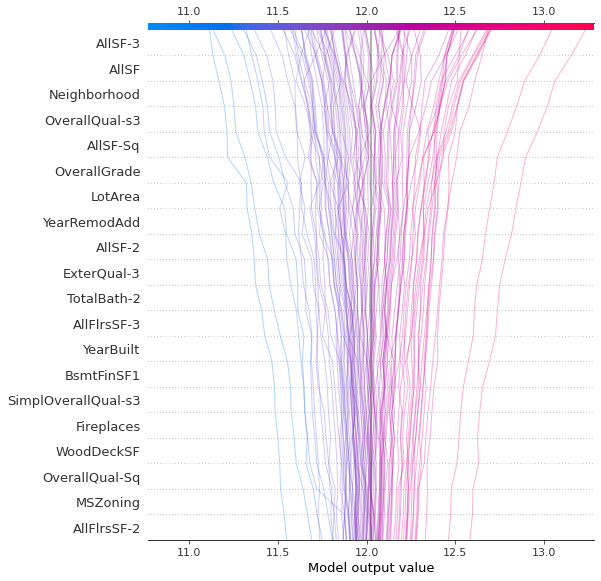

In [57]:
shap.decision_plot(explainer.expected_value, shap_values, all_x,alpha=0.3)

In [58]:
shap.force_plot(explainer.expected_value, shap_values,
                features=observations, feature_names=all_x)

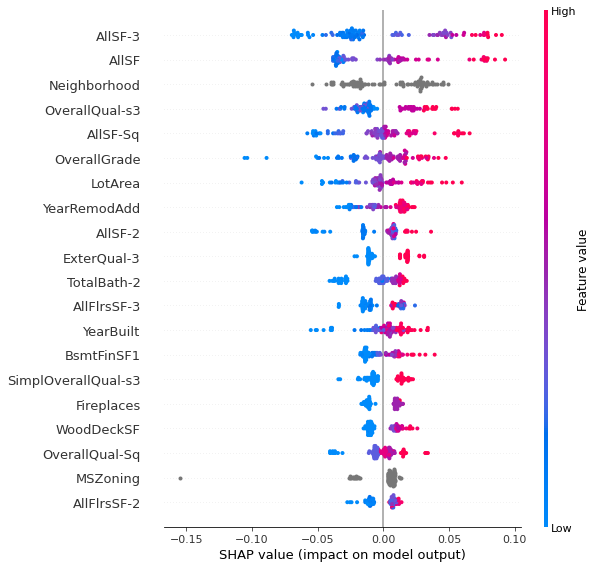

In [59]:
shap.summary_plot(shap_values, features=observations, feature_names=all_x)

In [60]:
#https://github.com/slundberg/shap/issues/373
# https://github.com/slundberg/shap/issues/662
shap.dependence_plot("LotArea", shap_values, 
                     pd.DataFrame(observations, columns=all_x), dot_size=10, x_jitter=0.02, alpha=0.5)

ValueError: could not convert string to float: 'RM'

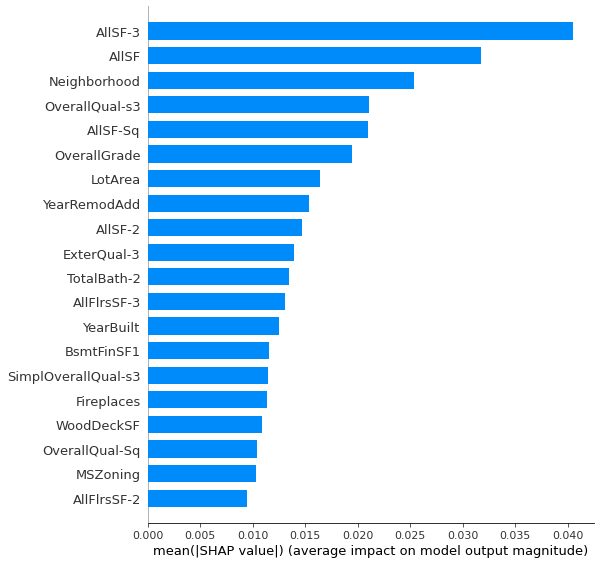

In [48]:
shap.summary_plot(shap_values, observations, plot_type="bar", feature_names=all_x)